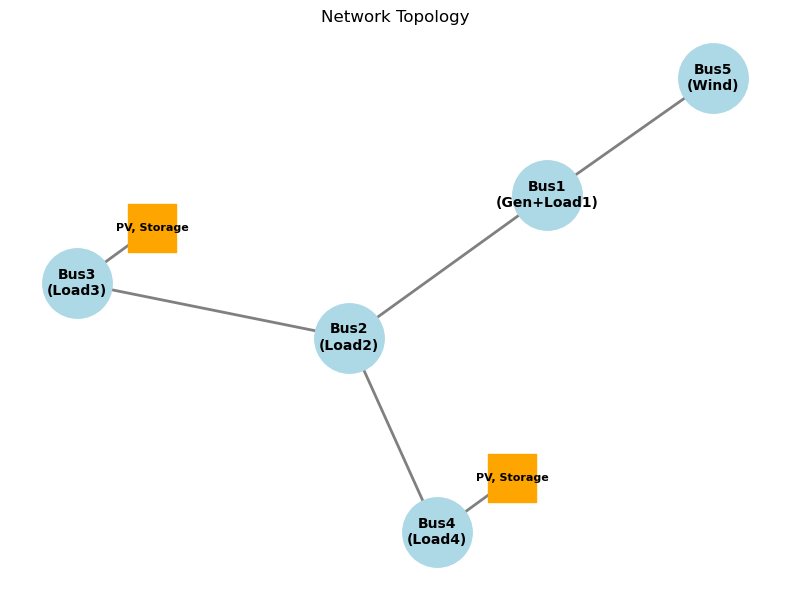

In [47]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_node("Bus1 (Gen+Load1)")
G.add_node("Bus2 (Load2)")
G.add_node("Bus3 (Load3)")
G.add_node("Bus4 (Load4)")
G.add_node("Bus5 (Wind)")

G.add_edge("Bus1 (Gen+Load1)", "Bus2 (Load2)")
G.add_edge("Bus2 (Load2)", "Bus3 (Load3)")
G.add_edge("Bus2 (Load2)", "Bus4 (Load4)")
G.add_edge("Bus1 (Gen+Load1)", "Bus5 (Wind)")

G.add_node("Bus3_PV_Storage")
G.add_node("Bus4_PV_Storage")
G.add_edge("Bus3 (Load3)", "Bus3_PV_Storage")
G.add_edge("Bus4 (Load4)", "Bus4_PV_Storage")

pos = nx.spring_layout(G, k=0.8, iterations=50, seed=42)
pos["Bus3_PV_Storage"] = (pos["Bus3 (Load3)"][0] + 0.15, pos["Bus3 (Load3)"][1] + 0.15)
pos["Bus4_PV_Storage"] = (pos["Bus4 (Load4)"][0] + 0.15, pos["Bus4 (Load4)"][1] + 0.15)

plt.figure(figsize=(8,6))
nx.draw_networkx_edges(G, pos, edge_color="gray", width=2)
main_nodes = ["Bus1 (Gen+Load1)", "Bus2 (Load2)", "Bus3 (Load3)", "Bus4 (Load4)", "Bus5 (Wind)"]
nx.draw_networkx_nodes(G, pos, nodelist=main_nodes, node_color="lightblue", node_size=2500, node_shape="o")
square_nodes = ["Bus3_PV_Storage", "Bus4_PV_Storage"]
nx.draw_networkx_nodes(G, pos, nodelist=square_nodes, node_color="orange", node_size=1200, node_shape="s")

main_labels = {
    "Bus1 (Gen+Load1)": "Bus1\n(Gen+Load1)",
    "Bus2 (Load2)": "Bus2\n(Load2)",
    "Bus3 (Load3)": "Bus3\n(Load3)",
    "Bus4 (Load4)": "Bus4\n(Load4)",
    "Bus5 (Wind)": "Bus5\n(Wind)"
}
nx.draw_networkx_labels(G, pos, labels=main_labels, font_color="black", font_size=10, font_weight="bold")
nx.draw_networkx_labels(G, pos, labels={"Bus3_PV_Storage": "PV, Storage", "Bus4_PV_Storage": "PV, Storage"},
                        font_color="black", font_size=8, font_weight="bold")

plt.title("Network Topology")
plt.axis("off")
plt.tight_layout()
plt.show()


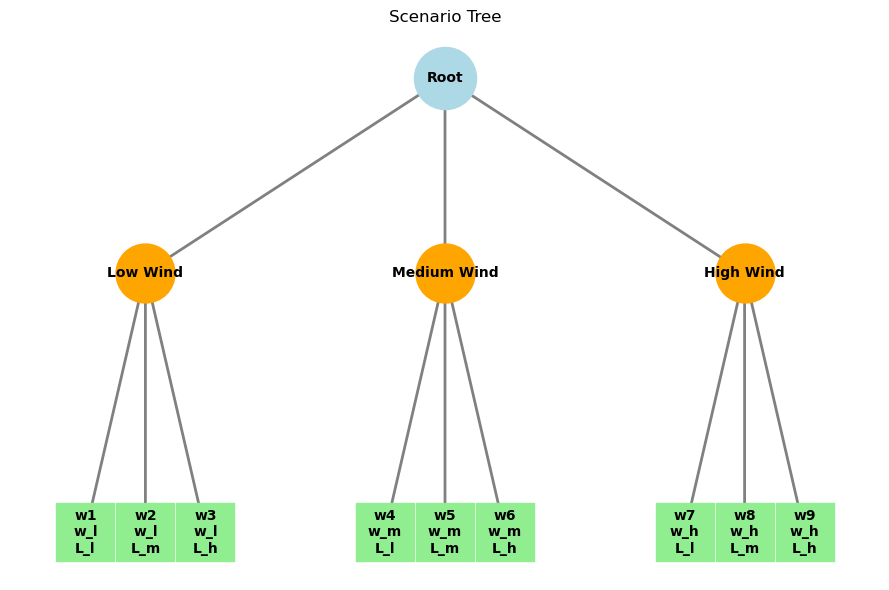

In [69]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_node("Root")
wind_nodes = ["W1", "W2", "W3"]
wind_labels = {
    "W1": "Low Wind",
    "W2": "Medium Wind",
    "W3": "High Wind"
}
for wnode in wind_nodes:
    G.add_node(wnode)
    G.add_edge("Root", wnode)

final_scenarios = {
    "w1": ("w_l", "L_l"),
    "w2": ("w_l", "L_m"),
    "w3": ("w_l", "L_h"),
    "w4": ("w_m", "L_l"),
    "w5": ("w_m", "L_m"),
    "w6": ("w_m", "L_h"),
    "w7": ("w_h", "L_l"),
    "w8": ("w_h", "L_m"),
    "w9": ("w_h", "L_h"),
}

G.add_node("w1")
G.add_edge("W1", "w1")
G.add_node("w2")
G.add_edge("W1", "w2")
G.add_node("w3")
G.add_edge("W1", "w3")

G.add_node("w4")
G.add_edge("W2", "w4")
G.add_node("w5")
G.add_edge("W2", "w5")
G.add_node("w6")
G.add_edge("W2", "w6")

G.add_node("w7")
G.add_edge("W3", "w7")
G.add_node("w8")
G.add_edge("W3", "w8")
G.add_node("w9")
G.add_edge("W3", "w9")

pos = {}
pos["Root"] = (0, 1.0)
pos["W1"]   = (-0.5, 0.7)
pos["W2"]   = ( 0.0, 0.7)
pos["W3"]   = ( 0.5, 0.7)

pos["w1"] = (-0.6, 0.3)
pos["w2"] = (-0.5, 0.3)
pos["w3"] = (-0.4, 0.3)

pos["w4"] = (-0.1, 0.3)
pos["w5"] = ( 0.0, 0.3)
pos["w6"] = ( 0.1, 0.3)

pos["w7"] = ( 0.4, 0.3)
pos["w8"] = ( 0.5, 0.3)
pos["w9"] = ( 0.6, 0.3)

labels = {}
labels["Root"] = "Root"
labels["W1"]   = "Low Wind"
labels["W2"]   = "Medium Wind"
labels["W3"]   = "High Wind"

for wX, (wind_str, load_str) in final_scenarios.items():
    labels[wX] = f"{wX}\n{wind_str}\n{load_str}"

plt.figure(figsize=(9,6))
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=10, edge_color="gray", width=2)

nx.draw_networkx_nodes(G, pos, nodelist=["Root"], node_color="lightblue", node_size=2000, node_shape="o")
nx.draw_networkx_nodes(G, pos, nodelist=wind_nodes, node_color="orange", node_size=1800, node_shape="o")
final_nodes = list(final_scenarios.keys())
nx.draw_networkx_nodes(G, pos, nodelist=final_nodes, node_color="lightgreen", node_size=1800, node_shape="s")

nx.draw_networkx_labels(G, pos, labels, font_size=10, font_weight="bold")

plt.title("Scenario Tree")
plt.axis("off")
plt.tight_layout()
plt.show()
